# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

# 1. Quick Installations and importations

In [1]:
pip install mlxtend      

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lightgbm     

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Importation of required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline                

OSError: dlopen(/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib/lib_lightgbm.so
  Reason: image not found

# 2. Quick look at the dataset

In [12]:
#Read dataset
diabetes_df = pd.read_csv('/Users/cegrib/Downloads/diabetes-3.csv')    

In [13]:
diabetes_df.head()    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#Let's see available columns and info about the dataset
diabetes_df.columns     

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
diabetes_df.info ()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
diabetes_df.describe().T    

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [18]:
#Check for nulls
diabetes_df.isnull().sum()      

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here, it appears there are no missing values. However, when we viewed the dataset earlier in [5], we saw that missing values had been replaced with 0, which is not biological correct in most cases. To address this, we will replace 0 value with NaN.

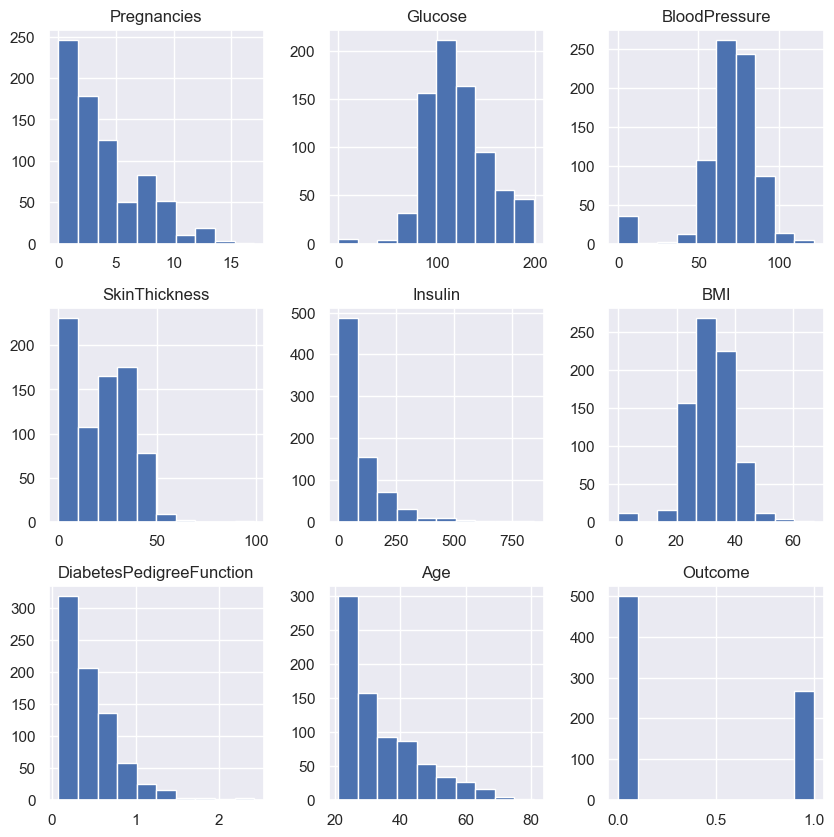

In [19]:
#Data distribution plots before removing or replacing nulls

p = diabetes_df.hist(figsize = (10,10))        

In [20]:
#Replace null values in a column with the mean value of that particular column
diabetes_df_new['Glucose'].fillna(diabetes_df_new['Glucose'].mean(), inplace = True)
diabetes_df_new['BloodPressure'].fillna(diabetes_df_new['BloodPressure'].mean(), inplace = True)
diabetes_df_new['SkinThickness'].fillna(diabetes_df_new['SkinThickness'].median(), inplace = True)
diabetes_df_new['Insulin'].fillna(diabetes_df_new['Insulin'].median(), inplace = True)
diabetes_df_new['BMI'].fillna(diabetes_df_new['BMI'].median(), inplace = True)     

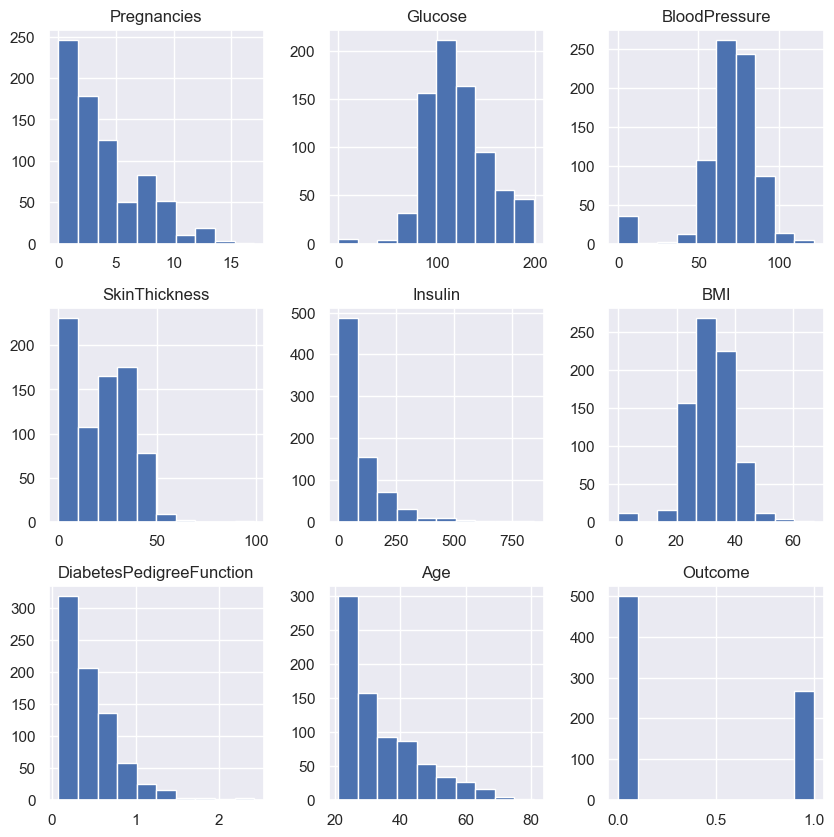

In [21]:
#Replot data distribution after replacing nulls with mean values
p = diabetes_df_new.hist(figsize = (10,10))         

In [22]:
#Final Null Count Analysis
diabetes_df_new.isnull().sum()        

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outcome
0    500
1    268
Name: count, dtype: int64


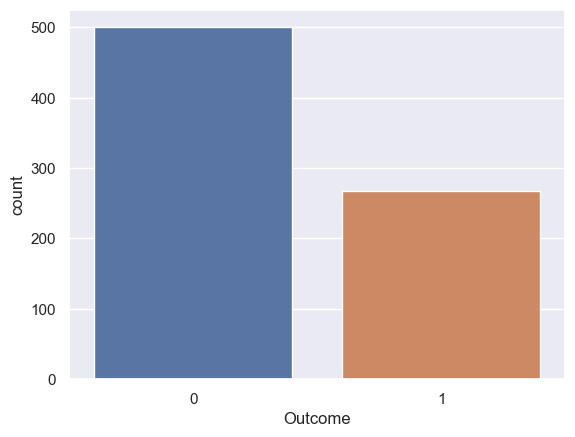

In [23]:
# Now let's check amd visualize the distribution of the outcome variable in the data.
# Outcome countplot
sns.countplot(x = 'Outcome',data = diabetes_df_new) 
print(diabetes_df_new.Outcome.value_counts())       

The dataset seems imbalance at 500:268; number of patients with 1 (diabetic) is almost half the patients with 0 (non-diabetic).

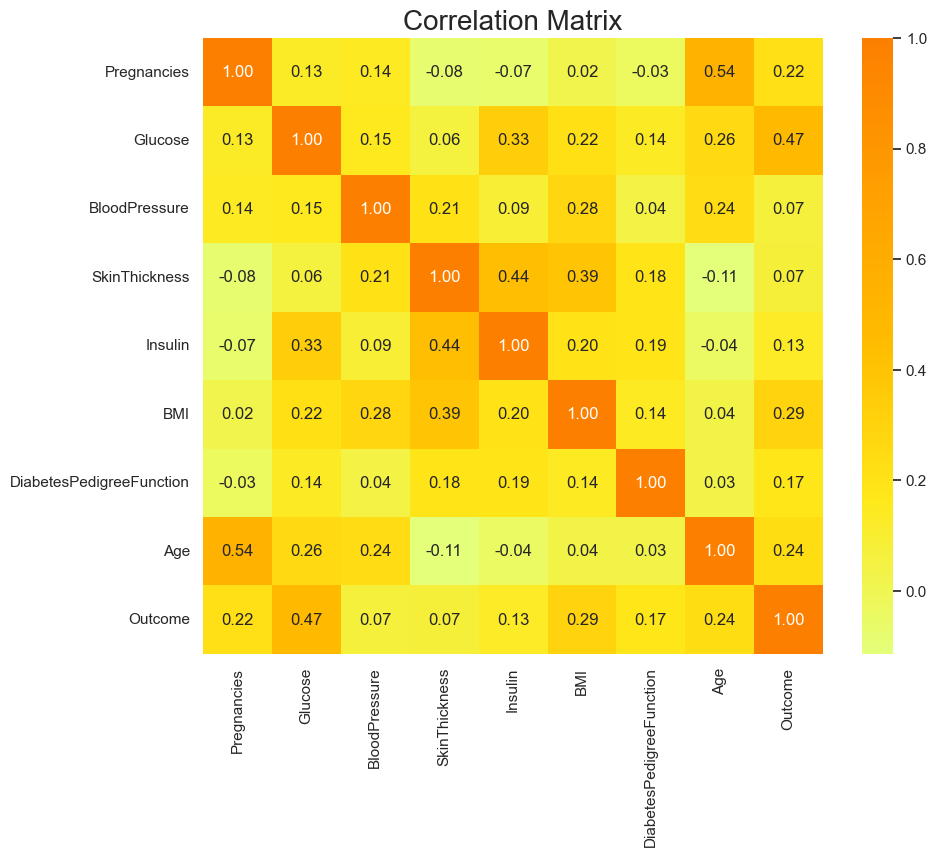

In [25]:
# Correlation matrix graph of the dataset
f, ax = plt.subplots(figsize= [10,8])
sns.heatmap(diabetes_df_new.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Wistia" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()  

Observations show that characteristics like pregnancy, glucose, BMI, and age are more closely associated with outcomes. I demonstrated a detailed illustration of these aspects in the following phases. 

/var/folders/5y/shv4cc7n29l9tzfd_bmgt__c0000gn/T/ipykernel_1475/4003232920.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(diabetes_df_new["Pregnancies"][diabetes_df_new["Outcome"] == 1], color = "Magenta", shade = True)
/var/folders/5y/shv4cc7n29l9tzfd_bmgt__c0000gn/T/ipykernel_1475/4003232920.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kde = sns.kdeplot(diabetes_df_new["Pregnancies"][diabetes_df_new["Outcome"] == 0], ax = kde, color = "Blue", shade= True)


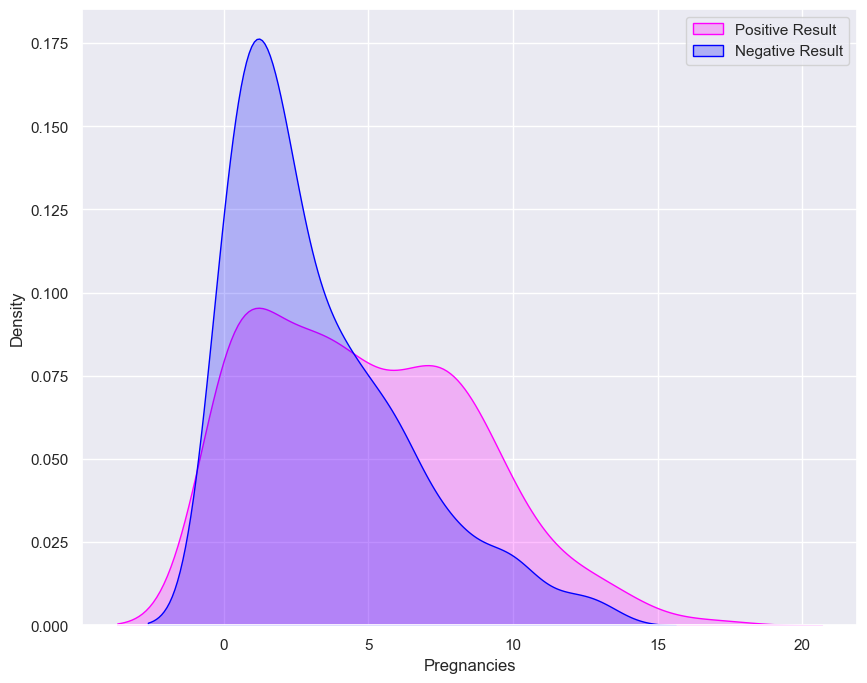

In [33]:
# Exploring Pregnancy and target variables together  
  
plt.figure(figsize = (10, 8))  
  
# Plotting density function graph of the pregnancies and the target variable  
kde = sns.kdeplot(diabetes_df_new["Pregnancies"][diabetes_df_new["Outcome"] == 1], color = "Magenta", shade = True)  
kde = sns.kdeplot(diabetes_df_new["Pregnancies"][diabetes_df_new["Outcome"] == 0], ax = kde, color = "Blue", shade= True)  
kde.set_xlabel("Pregnancies")  
kde.set_ylabel("Density")  
kde.legend(["Positive Result", "Negative Result"])          

According to the data, there is no evidence that women having diabetes have birth complications. However, the risk for future complications can be decreased by managing diabetes. The risk of pregnancy issues, such as hypertension, depression, preterm birth, birth abnormalities, and pregnancy loss, is increased if women have uncontrolled diabetes.

<Axes: xlabel='Outcome', ylabel='Glucose'>

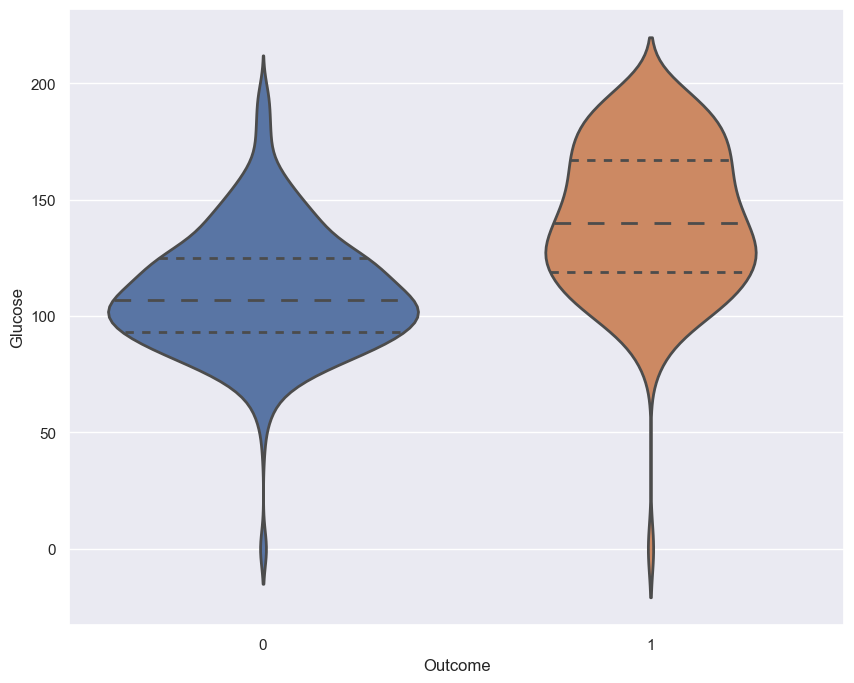

In [35]:
# Exploring the Glucose and the Target variables together  
plt.figure(figsize = (10, 8))  
sns.violinplot(data = diabetes_df_new, x = "Outcome", y = "Glucose",  
               split = True, inner = "quart", linewidth = 2)    

In [ ]:
The likelihood of developing diabetes increases with glucose levels.

# 3. Transforming the data into quartiles 

In [42]:
from sklearn.preprocessing import QuantileTransformer 

In [44]:
quartile  = QuantileTransformer()  
X = quartile.fit_transform(diabetes_df_new)  
dataset = quartile.transform(X)  
dataset = pd.DataFrame(X)  
dataset.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']  
# Showing the top 5 rows of the transformed dataset  
dataset.head()     

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.747718,0.810300,0.516949,0.801825,0.000000,0.591265,0.750978,0.889831,1.0
1,0.232725,0.097784,0.336375,0.644720,0.000000,0.227510,0.475880,0.558670,0.0
2,0.863755,0.956975,0.279009,0.000000,0.000000,0.091917,0.782269,0.585398,1.0
3,0.232725,0.131030,0.336375,0.505867,0.662973,0.298566,0.106258,0.000000,0.0
4,0.000000,0.721643,0.050847,0.801825,0.834420,0.926988,0.997392,0.606258,1.0


# 4. Outlier Analysis

In [45]:
for feature in diabetes_df_new:
    Q1 = diabetes_df_new[feature].quantile(0.25)
    Q3 = diabetes_df_new[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if diabetes_df_new[(diabetes_df_new[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")   

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


All the independent variables (except glucose) have outliers

In [46]:
# Determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabetes_df_new)   

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [47]:
diabetes_df_new_scores = lof.negative_outlier_factor_
np.sort(diabetes_df_new_scores)[0:30]    

array([-3.30445978, -2.48884101, -2.28758733, -2.10500141, -2.05369597,
       -2.02885837, -2.01096252, -2.00720763, -1.98655427, -1.95338702,
       -1.91601291, -1.88815728, -1.8134966 , -1.80857804, -1.74187579,
       -1.73154315, -1.71639102, -1.71372358, -1.67587303, -1.64102097,
       -1.63498158, -1.62215678, -1.61146741, -1.59344933, -1.54582494,
       -1.54285259, -1.51413703, -1.49974262, -1.49619189, -1.48877158])

In [49]:
#Choose the threshold value according to lof scores
threshold = np.sort(diabetes_df_new_scores)[7]
threshold    

-2.007207629622323

In [50]:
#Delete those that are higher than the threshold
outlier = diabetes_df_new_scores > threshold
diabetes_df_new = diabetes_df_new[outlier]        

In [51]:
#Let's recheck the size of the dataset
diabetes_df_new.shape   

(760, 9)

# 6. Feature Engineeering

In [56]:
# According to BMI column, some categorical variables were assigned.

NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
diabetes_df_new["NewBMI"] = NewBMI
diabetes_df_new.loc[diabetes_df_new["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
diabetes_df_new.loc[(diabetes_df_new["BMI"] > 18.5) & (diabetes_df_new["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes_df_new.loc[(diabetes_df_new["BMI"] > 24.9) & (diabetes_df_new["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes_df_new.loc[(diabetes_df_new["BMI"] > 29.9) & (diabetes_df_new["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes_df_new.loc[(diabetes_df_new["BMI"] > 34.9) & (diabetes_df_new["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes_df_new.loc[diabetes_df_new["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]  

diabetes_df_new.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3


In [63]:
#According to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal" 
diabetes_df_new = diabetes_df_new.assign(NewInsulinScore=diabetes_df_new.apply(set_insulin, axis=1))     
diabetes_df_new.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Abnormal,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [65]:
#Glucose variables were assigned dummy variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
diabetes_df_new["NewGlucose"] = NewGlucose
diabetes_df_new.loc[diabetes_df_new["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
diabetes_df_new.loc[(diabetes_df_new["Glucose"] > 70) & (diabetes_df_new["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
diabetes_df_new.loc[(diabetes_df_new["Glucose"] > 99) & (diabetes_df_new["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
diabetes_df_new.loc[diabetes_df_new["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]        

In [66]:
diabetes_df_new.head()            

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148,72,35,0,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85,66,29,0,26.6,0.351,31,0,Overweight,Abnormal,Normal
2,8,183,64,0,0,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89,66,23,94,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137,40,35,168,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


# 7. Encoding

In [67]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
diabetes_df_new = pd.get_dummies(diabetes_df_new, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)            

In [68]:
diabetes_df_new.head()         

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72,35,0,33.6,0.627,50,1,True,False,False,False,False,False,False,False,False,True
1,1,85,66,29,0,26.6,0.351,31,0,False,False,False,True,False,False,False,True,False,False
2,8,183,64,0,0,23.3,0.672,32,1,False,False,False,False,False,False,False,False,False,True
3,1,89,66,23,94,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False,False
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [70]:
categorical_diabetes_df_new = diabetes_df_new[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight']]         

In [71]:
categorical_diabetes_df_new.head()    

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight
0,True,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,True,False,True,False
4,False,False,True,False,False,False,False,False,False


In [110]:
y = diabetes_df_new["Outcome"]
X = diabetes_df_new.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index   

In [73]:
X.head()   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [156]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index) 

In [157]:
X.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.775,-0.025324,0.857143,0.000000,0.144444,0.672313,1.235294
1,-0.4,-0.800,-0.400324,0.000000,0.000000,-0.633333,-0.046906,0.117647
2,1.0,1.650,-0.525324,0.000000,0.000000,-1.000000,0.789577,0.176471
3,-0.4,-0.700,-0.400324,-0.857143,-7.294118,-0.466667,-0.526384,-0.470588
4,-0.6,0.500,-2.025324,0.857143,10.117647,1.200000,5.000651,0.235294


In [159]:
X = pd.concat([X,categorical_diabetes_df_new], axis = 1)  

In [111]:
X.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [161]:
y.head() 

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

# 6. Splitting the dataset

In [112]:
X = diabetes_df_new.drop('Outcome', axis=1)
y = diabetes_df_new['Outcome']   

In [114]:
#Split the data into training and testing data using the train_test_split function
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,
                                                    random_state=7)  
# Printing the size of the training and testing dataset  
print("The size of the training dataset: ", X_train.size)  
print("The size of the testing dataset: ", X_test.size)        

The size of the training dataset:  10944
The size of the testing dataset:  2736


The above code splits the dataset into the train (80%) and test (20%) datasets.

In [ ]:
#Prediction from support vector machine model on the testing data

In [126]:
# Python program to create a function to validate models  
  
def cv_model(models):  
    """ 
    We will create a list of machine learning models and print graphs of cross-validation scores with the help of mean accuracy. 
    """  
      
    # Cross validating the model using the Kfold stratified cross-validation method  
    k_fold = StratifiedKFold(n_splits = 15)  
      
    r = []  
    for m in models :  
        r.append(cross_val_score(estimator = m, X = X_train, y = y_train, scoring = "accuracy", cv = k_fold, n_jobs = 4))  
  
    cross_val_means = []  
    cross_val_std = []  
    for result in r:  
        cross_val_means.append(result.mean())  
        cross_val_std.append(result.std())  
  
    df_result = pd.DataFrame({  
        "CrossValMean": cross_val_means,  
        "CrossValStd": cross_val_std,  
        "Model List":[  
            "DecisionTreeClassifier",  
            "LogisticRegression",
                        "SVC",  
            "AdaBoostClassifier",  
            "GradientBoostingClassifier",  
            "RandomForestClassifier",  
            "KNeighborsClassifier"  
        ]  
    })  
  
    # Generating the graph of cross-validation scores  
    bar_plot = sns.barplot(x = cross_val_means, y = df_result["Model List"].values, data = df_result)  
    bar_plot.set_xlabel("Mean of Cross Validation Accuracy Scores")  
    bar_plot.set_title("Cross Validation Scores of Models")  
    return df_result     

In [127]:
# Import libraries  
import numpy as np # for linear algebra  
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)  
import seaborn as sns # for data visualization  
import matplotlib.pyplot as plt # to plot data visualization charts  
from collections import Counter  
import os  
  
# Modeling Libraries  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score  
from sklearn.preprocessing import QuantileTransformer  
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier  
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split  
from sklearn.svm import SVC    

,CrossValMean,CrossValStd,Model List
0,0.733659,0.067917,DecisionTreeClassifier
1,0.768252,0.083073,LogisticRegression
2,0.761341,0.072697,SVC
3,0.727236,0.062996,AdaBoostClassifier
4,0.756585,0.058345,GradientBoostingClassifier
5,0.776341,0.059888,RandomForestClassifier
6,0.721951,0.074647,KNeighborsClassifier


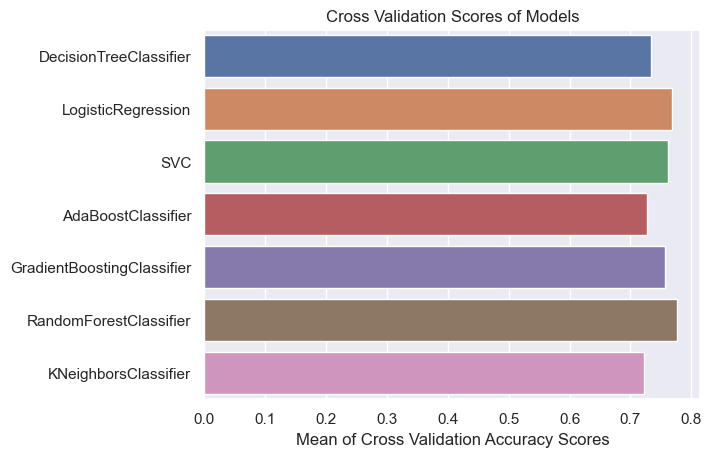

In [128]:
# Modeling the dataset using different machine learning algorithms  
state = 20  
models_list = [  
    DecisionTreeClassifier(random_state = state),  
    LogisticRegression(random_state = state, solver ='liblinear'),  
    SVC(random_state = state),  
    AdaBoostClassifier(DecisionTreeClassifier(random_state = state), random_state = state, learning_rate = 0.3),  
    GradientBoostingClassifier(random_state = state),  
    RandomForestClassifier(random_state = state),  
    KNeighborsClassifier()  
]  
cv_model(models_list)        

According to the above analysis, we have discovered that the RandomForestClassifier, LogisticRegression, and SVC models have higher accuracy. We will therefore perform hyperparameter tuning on these three different models.

# 7. Hyperparameter Tuning

Hyperparameter tuning is essential for machine learning models to work.

We will tune the RandomForestClassifier, LogisticRegression, and SVC models.

In [132]:
# Importing the required libraries  
from sklearn.metrics import classification_report  
from sklearn.model_selection import GridSearchCV  
  
# Defining a function to analyse the grid results  
def analyze_grid(grid):  
    ''''' 
    Analyzing the results of GridCV method and making predictions for the test data 
    Presenting the classification report at the end 
    '''      
    # Printing the best parameter and accuracy score  
    print("Tuned hyperparameters: ", grid.best_params_)  
    print("Accuracy Score:", grid.best_score_)  
      
    mean_values = grid.cv_results_["mean_test_score"]  
    std_values = grid.cv_results_["std_test_score"]  
    for m, s, p in zip(mean_values, std_values, grid.cv_results_["params"]):  
      print(f"Mean: {m}, Std: {s} * 2, Params: {p}")  
      print("The classification Report:")  
    y_true, y_pred = y_test, grid.predict(X_test)  
    print(classification_report(y_true, y_pred))  
    print()    

GridSearchCV and the classification report classes are firstly imported from the Sklearn package. The "analyse grid" method, which will display the predicted result, is then defined. We have invoked this method for each model we utilised in SearchCV. We will tune each model in the following stage.

# 7.1. Tuning Hyperparameters of LogisticRegression

In [133]:
# Defining the Logistic Regression model and its parameters  
model = LogisticRegression(solver ='liblinear')  
solver_list = ['liblinear']  
penalty_type = ['l2']  
c_values = [200, 100, 10, 1.0, 0.01]  
  
# Defining the grid search  
grid_lr = dict(solver = solver_list, penalty = penalty_type, C = c_values)  
cross_val = StratifiedKFold(n_splits = 100, random_state = 10, shuffle = True)  
grid_search_cv = GridSearchCV(estimator = model, param_grid = grid_lr, cv = cross_val, scoring = 'accuracy', error_score = 0)  
lr_result = grid_search_cv.fit(X_train, y_train)  
  
# Result of Hyper Parameters of Logistic Regression  
analyze_grid(lr_result)     

Tuned hyperparameters:  {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy Score: 0.7859523809523808
Mean: 0.7859523809523808, Std: 0.1627253365256692 * 2, Params: {'C': 200, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7826190476190475, Std: 0.16171750375394797 * 2, Params: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7776190476190478, Std: 0.16092913328867178 * 2, Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7788095238095236, Std: 0.16181002130028066 * 2, Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
Mean: 0.7328571428571428, Std: 0.15022960507291105 * 2, Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
The classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       111
           1       0.50      0.63      0.56        41

    accuracy     

As we can see in the output, the best score returned by the LogisticRegression model is 0.79

# 7.2. Tuning Hyperparameters of SVC

In [134]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
svc = SVC()  
parameters = [  
    {"kernel": ["rbf"], "gamma": [1e-4], "C": [200, 100, 10, 1.0, 0.01]}  
]  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = svc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter tuning result  
result = grid.fit(X_train, y_train)  
  
analyze_grid(result)   

Tuned hyperparameters:  {'C': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}
Accuracy Score: 0.7532637500203222
Mean: 0.7187403469410981, Std: 0.007322755431867515 * 2, Params: {'C': 200, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.725308491440277, Std: 0.010664982002706942 * 2, Params: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7483051260791104, Std: 0.024702558369268438 * 2, Params: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.7532637500203222, Std: 0.01259779434376617 * 2, Params: {'C': 1.0, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
Mean: 0.6299322050431644, Std: 0.0008621991674225101 * 2, Params: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
The classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       111
           1       0.54      0.54      0.54        41

    accuracy                           0.75     

SVC Model's maximum accuracy is 0.753, somewhat less than that of Logistic Regression.

# 7.2. Tuning Hyperparameters of RandomForestClassifier

In [135]:
# Defining the SVC model and its parameters  
  
# Defining the grid search  
rfc = RandomForestClassifier(random_state = 42)  
parameters = {   
    'n_estimators': [500],  
    'max_features': ['log2'],  
    'max_depth' : [4,5,6],  
    'criterion' :['entropy']  
}  
  
# Performing the cross-validation with tuned parameters  
cross_val = StratifiedKFold(n_splits = 3, random_state = 10, shuffle = True)  
  
# Performing the grid search  
grid = GridSearchCV(estimator = rfc, param_grid = parameters, cv = cross_val, scoring = 'accuracy')  
  
# SVC Hyperparameter Tuning Result  
result = grid.fit(X_train, y_train)  
  
analyze_grid(result)   

Tuned hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
Accuracy Score: 0.7762603846591555
Mean: 0.7680664618185956, Std: 0.024716761111734223 * 2, Params: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.7762603846591555, Std: 0.036879325898412814 * 2, Params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
Mean: 0.7598237656277943, Std: 0.03407758609007502 * 2, Params: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 500}
The classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       111
           1       0.51      0.56      0.53        41

    accuracy                           0.74       152
   macro avg       0.67      0.68      0.68       152
weighted avg       0.75      0.74      0.74       

RandomForestClassifier's maximum accuracy score is 0.78

We will now make predictions using the model of tuned hyperparameters with the highest accuracy score

# 8. Making predictions

In [136]:
y_pred = lr_result.predict(X_test)  
print(classification_report(y_test, y_pred))   

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       111
           1       0.50      0.63      0.56        41

    accuracy                           0.73       152
   macro avg       0.68      0.70      0.68       152
weighted avg       0.76      0.73      0.74       152



In [137]:
X_test['predictions'] = y_pred  
print(X_test)   

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
477            7      114             76             17      110  23.8  \
741            3      102             44             20       94  30.8   
553            1       88             62             24       44  29.9   
449            0      120             74             18       63  30.5   
701            6      125             78             31        0  27.6   
..           ...      ...            ...            ...      ...   ...   
327           10      179             70              0        0  35.1   
333           12      106             80              0        0  23.6   
372            0       84             64             22       66  35.8   
325            1      157             72             21      168  25.6   
673            3      123            100             35      240  57.3   

     DiabetesPedigreeFunction  Age  NewBMI_Obesity 1  NewBMI_Obesity 2   
477                     0.466   31   

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. LogisticRegression model is the best model for this prediction since it has a maximmum accuracy_score of 0.79.

2. One of the risks during pregnancy is diabetes. It will have to be diagnosed to avoid problems.

3. An increase in glucose levels is strongly correlated to a rise in diabetes.

Glucose as a feature is the most important in this dataset